# Data Analysis in Geoscience Remote Sensing Projects: Exercises 
## Solutions to tasks: Change point analyses
Hendrik Andersen | contact: hendrik.andersen@kit.edu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy.stats import pearsonr

# first, let's create an artificial time series of one year
n = 365
date_today = datetime.now()
days = pd.date_range(date_today, date_today + timedelta(n-1), freq='D')

np.random.seed(seed=1)
data = np.random.randn(n) # x and y are normally distributed random numbers

df = pd.DataFrame({'time': days, 'data': data})
df['data'][200:] += 5 # 5 is added to all values after the 200th data point 

/var/folders/t6/5_9wb5l977x88ky4d3sq3tnc0000gn/T/ipykernel_1605/414301929.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'][200:] += 5 # 5 is added to all values after the 200th data point


1. Try to understand the function moving_window. What does it do?
> First, it creates an empty list (results = []). Then, it iterates over the data provided. Note: it reduces the number of iterations by half of the window size, as these are the last data points where the window can not be calculated complete(for i in range(data.size-window_size//2):). It then calculates a statistic for the window by indexing like this: [i:i+window_size]
2. Experiment with the function and plot different statistics for different window sizes. Which statistic is particularly useful to detect the rapid change in the mean value of the artificial data set? 
> The standard deviation, as seen on slide 8 from the corresponding lecture. The change point is where the maximum of the standard deviation in the window is reached.
3. Usually, much nicer (and faster) implementations of simple functions such as "moving_window" exist. Find a pandas solution that works out of the box as a one-liner. 
> pd.rolling(window_size).std()
4. Find a solution to use a moving window approach to find the correct change point (should be around the 200th data point). You may look at the lecture slides again to help you remind the solution we discussed in the lecture.
> change_point = df['time'][np.where(df['data'].rolling(window_size,center=True).std() == np.max(df['data'].rolling(window_size,center=True).std()))[0][0]]
5. Write a cell of code in which the change point is detected using the pandas implementation. Plot the time series, and add the detected change point as a red vertical line. Does the change point identify the correct time, and if not - why not? Is there a solution to the problem?
> The problem can be in the way the pandas function "rolling" returns the result. Remember: A moving window always reduces the number of data points, as the window cannot be calculated at the edges. Depending on how the function returns the data, this can mean that the data is "shifted". You keep the values at the correct placing by providing the funtion the argument center = True as shown below 

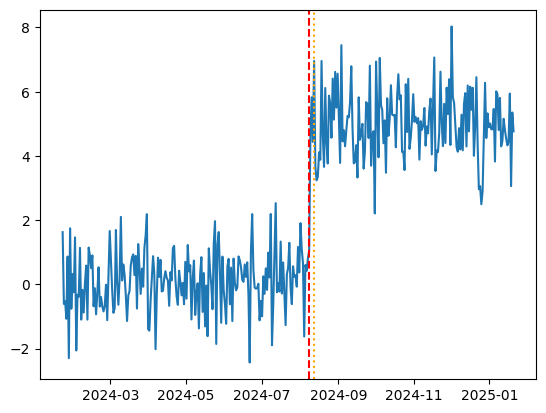

In [2]:
window_size = 10
change_point_shifted = df['time'][df.data.rolling(10).std().idxmax()]
change_point = df['time'][df.data.rolling(10,center=True).std().idxmax()]

plt.plot(df['time'],df['data'])
plt.axvline(change_point, c = 'r', linestyle='--')
plt.axvline(change_point_shifted, c = 'orange', linestyle=':')

In [21]:
n = 3650
date_today = datetime.now()
days = pd.date_range(date_today, date_today + timedelta(n-1), freq='D')

np.random.seed(seed=1)
data = np.random.randn(n) # x and y are normally distributed random numbers

df_trend = pd.DataFrame({'time': days, 'data': data})
df_trend['data'][2000:] += np.linspace(0.1,10,1650)


def moving_window(data, statistic = 'mean', window_size = 10):
    from numpy import array
    from scipy.stats import linregress
    """Returns a list of a statistic from a moving window
    
    Keyword arguments:
    statistic -- string, can be 'mean', 'std', 'min', 'max','trend'
    window_size -- integer, self explanatory 
    """
    results = []
    for i in range(data.size-window_size):
        if statistic == 'mean':
            results.append(np.mean(data[i:i+window_size]))
        elif statistic == 'std':
            results.append(np.std(data[i:i+window_size]))
        elif statistic == 'max':
            results.append(np.max(data[i:i+window_size]))
        elif statistic == 'min':
            results.append(np.min(data[i:i+window_size]))
        elif statistic == 'trend':
            try:
                results.append(linregress(np.arange(window_size),data[i:i+window_size]).slope)
            except:
                results.append(np.nan)
        else:
            print('statistic does not exist')
    return array(results)

/var/folders/t6/5_9wb5l977x88ky4d3sq3tnc0000gn/T/ipykernel_1605/4110164870.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trend['data'][2000:] += np.linspace(0.1,10,1650)


6. Now the function "moving_window" includes the "trend" statistic, which is the slope of the linear regression line in a moving window. Experiment with this function to find a way to use this for the change point detection.
> Using the moving window of the trend in the data transforms the problem to a similar one as before (change in the mean state). As such, we can nest two moving windows to detect the change signal of the changing trend here. The first moving window calculates the change in the trend signal. The second moving window uses std in a moving window as in the example above. Using the maximum of the standard deviation detects the time of trend change. 
7. Detect the change point and create a plot as in Task 1. 
> see Task 1

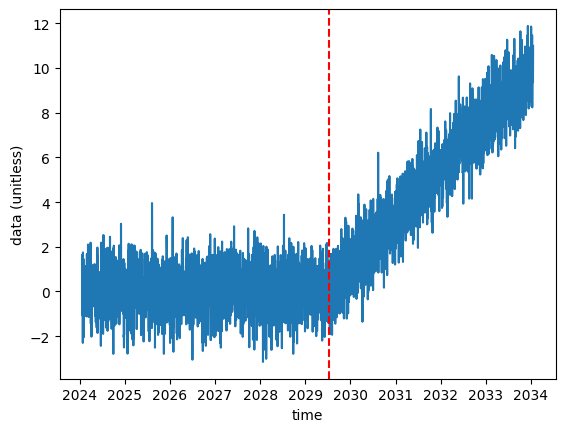

In [37]:
plt.plot(df_trend['time'],df_trend['data'])
plt.ylabel('data (unitless)')
plt.xlabel('time')
plt.axvline(df_trend['time'][2000], c = 'r', linestyle='--')

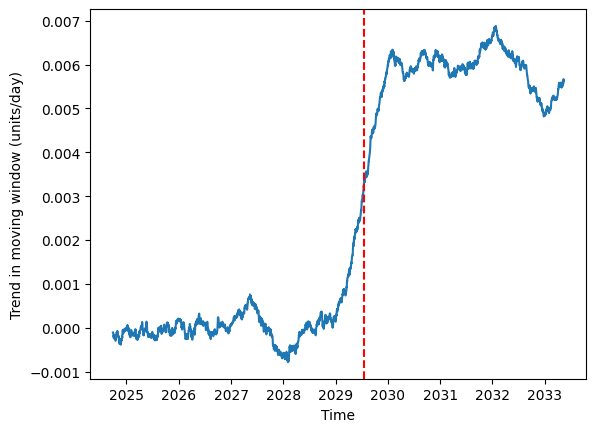

In [36]:
trend = moving_window(df_trend['data'],'trend',500)
plt.plot(df_trend['time'][250:-250],trend)
plt.ylabel('Trend in moving window (units/day)')
plt.xlabel('Time')
plt.axvline(df_trend['time'][2000], c = 'r', linestyle='--')

Text(0, 0.5, 'Standard deviation in moving trend window')

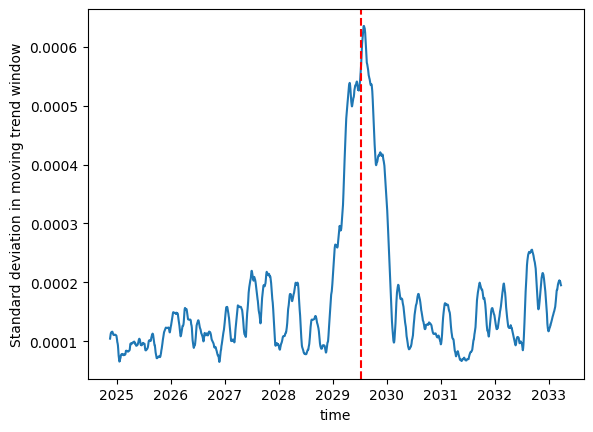

In [34]:
plt.plot(df_trend['time'][300:-300],moving_window(moving_window(df_trend['data'],'trend',500),'std',100))
plt.axvline(df_trend['time'][2000], c = 'r', linestyle='--')
plt.xlabel('time')
plt.ylabel('Standard deviation in moving trend window')